# Import Libray dan modul keras

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

# Read Dataset

In [8]:
df = pd.read_csv('gender_classification_v7.csv')
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


## Mengecek Nilai Null

In [9]:
df.isnull().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

## Mengecek tipe data

In [10]:
df.dtypes

long_hair                      int64
forehead_width_cm            float64
forehead_height_cm           float64
nose_wide                      int64
nose_long                      int64
lips_thin                      int64
distance_nose_to_lip_long      int64
gender                        object
dtype: object

## Encoding Data dengan Menggunakan Fungsi Ordinal Encoder

In [15]:
encoder = OrdinalEncoder()
df["nose_wide"] = encoder.fit_transform(df[["nose_wide"]])
df["nose_long"] = encoder.fit_transform(df[["nose_long"]])
df["lips_thin"] = encoder.fit_transform(df[["lips_thin"]])
df["distance_nose_to_lip_long"] = encoder.fit_transform(df[["distance_nose_to_lip_long"]])

## Data Split

In [18]:
X = df[['nose_wide', 'nose_long', 'lips_thin', 'distance_nose_to_lip_long']]
Y = df['gender']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

# Menampilkan Dimensi
print("Dimensi x_Train: ", X_train.shape)
print("Dimensi x_Test: ", X_test.shape)
print("Dimensi y_Train: ", Y_train.shape)
print("Dimensi y_Test: ", Y_test.shape)

Dimensi x_Train:  (3500, 4)
Dimensi x_Test:  (1501, 4)
Dimensi y_Train:  (3500,)
Dimensi y_Test:  (1501,)


## Mengecek Nilai Unique

In [20]:
df['gender'].unique()

array([1., 0.])

## Encoding Label

In [115]:
num_class = 20

y_train = tf.keras.utils.to_categorical(Y_train, num_class)
y_test = tf.keras.utils.to_categorical(Y_test, num_class)

## Membuat DNN

In [119]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(128, activation='relu', input_dim = 4),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(20, activation='softmax')
    ]
)
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 128)               640       
                                                                 
 dense_28 (Dense)            (None, 64)                8256      
                                                                 
 dense_29 (Dense)            (None, 20)                1300      
                                                                 
Total params: 10,196
Trainable params: 10,196
Non-trainable params: 0
_________________________________________________________________


## Optional Model

In [120]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

## Training Model

In [121]:
outuput = model.fit(X_train, y_train, epochs = 10, validation_data = (X_test, y_test))

Epoch 1/10
110/110 [==============================] - 1s 5ms/step - loss: 0.2656 - accuracy: 0.4623 - val_loss: 0.0601 - val_accuracy: 0.7948
Epoch 2/10
110/110 [==============================] - 0s 4ms/step - loss: 0.0313 - accuracy: 0.9289 - val_loss: 0.0145 - val_accuracy: 0.9547
Epoch 3/10
110/110 [==============================] - 0s 3ms/step - loss: 0.0114 - accuracy: 0.9586 - val_loss: 0.0098 - val_accuracy: 0.9547
Epoch 4/10
110/110 [==============================] - 0s 3ms/step - loss: 0.0094 - accuracy: 0.9577 - val_loss: 0.0088 - val_accuracy: 0.9580
Epoch 5/10
110/110 [==============================] - 0s 3ms/step - loss: 0.0090 - accuracy: 0.9583 - val_loss: 0.0093 - val_accuracy: 0.9574
Epoch 6/10
110/110 [==============================] - 0s 3ms/step - loss: 0.0090 - accuracy: 0.9554 - val_loss: 0.0086 - val_accuracy: 0.9580
Epoch 7/10
110/110 [==============================] - 0s 3ms/step - loss: 0.0087 - accuracy: 0.9597 - val_loss: 0.0086 - val_accuracy: 0.9587
Epoch 

## Evaluasi Model

In [123]:
print("Akurasi :", outuput.history["accuracy"][-1])
print("Loss : ", outuput.history['loss'][-1])
print("Akurasi validasi :", outuput.history["val_accuracy"][-1])
print("Validasi Loss :",outuput.history['val_loss'][-1])

Akurasi : 0.9574285745620728
Loss :  0.008728877641260624
Akurasi validasi : 0.9586942195892334
Validasi Loss : 0.008743923157453537


## Visualisasi Akurasi

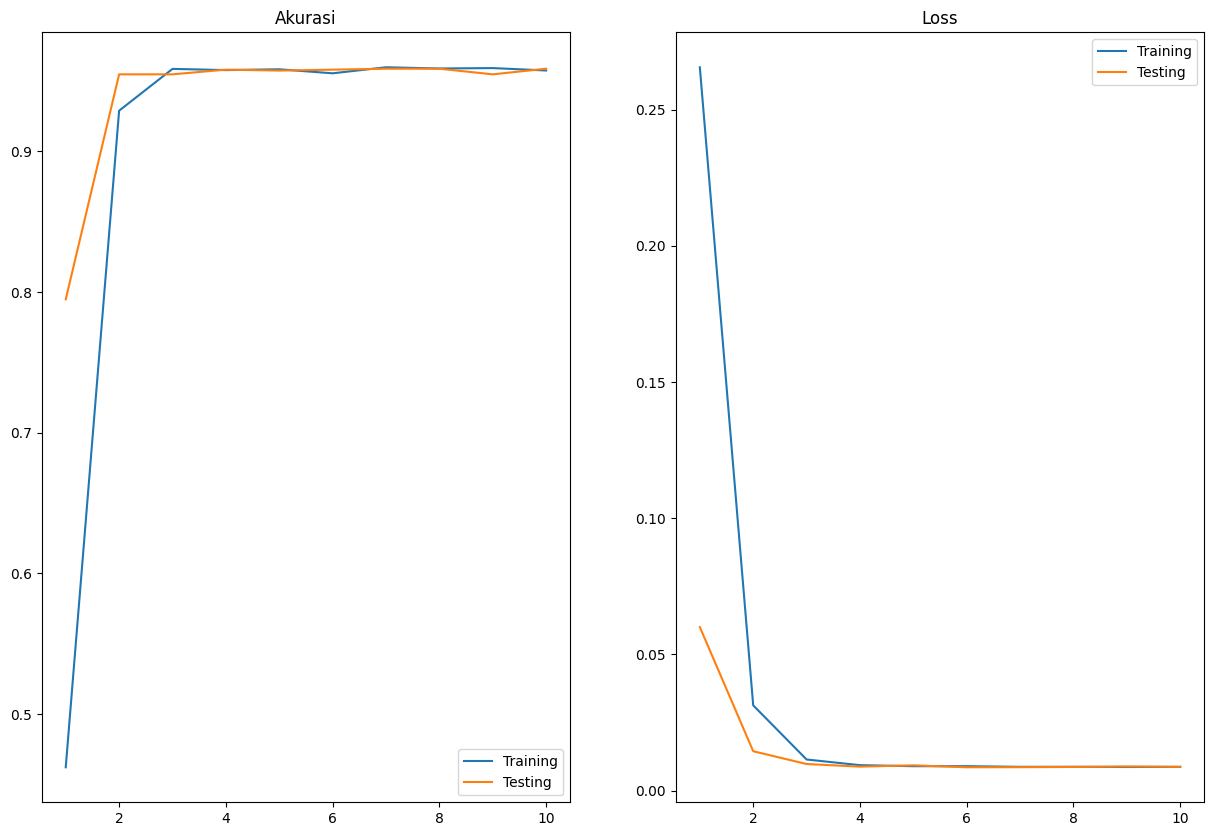

In [124]:
plt.figure(figsize=(15,10))

epochs_run = [i+1 for i in range(10)]

# Akurasi
plt.subplot(1,2,1)
plt.plot(epochs_run, outuput.history['accuracy'], label='Training')
plt.plot(epochs_run, outuput.history['val_accuracy'], label='Testing')
plt.title("Akurasi")
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(epochs_run, outuput.history['loss'], label='Training')
plt.plot(epochs_run, outuput.history['val_loss'], label='Testing')
plt.title("Loss")
plt.legend()

plt.show()